# KMeans 

In [1]:
import pandas as pd

# Carregar o dataset a partir do arquivo CSV
file_path = r'C:\Users\victor\OneDrive\Documentos\GitHub\InteligenciaArtificial_Projeto1\Dataset_EEG\EEG_data.csv'
dataset = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset para conferência
dataset.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [2]:
from sklearn.preprocessing import LabelEncoder

# Separar entrada (features) e saída (labels)
entrada = dataset.iloc[:, :-1]
saida = dataset.iloc[:, -1]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalar os dados
scaler = StandardScaler()
entrada_scaled = scaler.fit_transform(entrada)

# Aplicar PCA
pca = PCA(n_components=2)
entrada_pca = pca.fit_transform(entrada_scaled)

# Dividir o dataset em treino e teste (70% treino, 30% teste)
entrada_treino, entrada_teste, saida_treino, saida_teste = train_test_split(entrada_pca, saida, test_size=0.3, random_state=42)


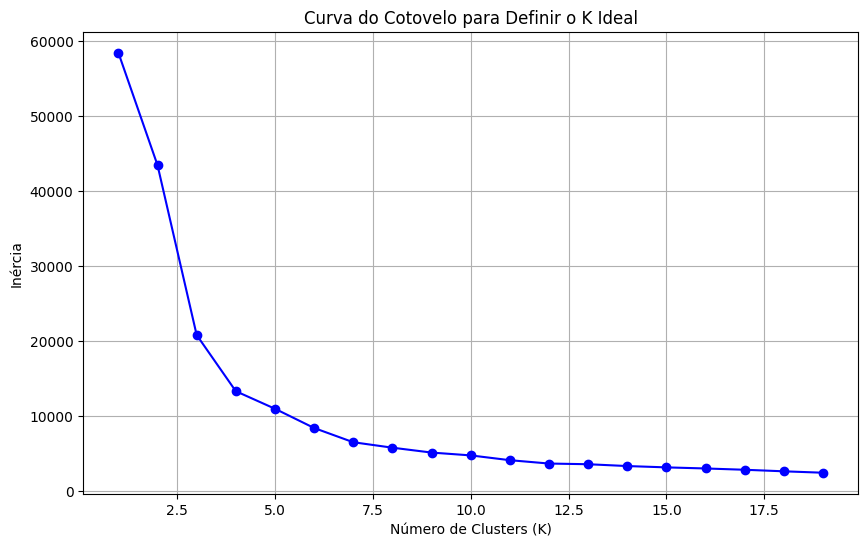

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(entrada_treino)
    inertia.append(kmeans.inertia_)

# Plotar a Curva do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), inertia, marker='o', color='b')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.title("Curva do Cotovelo para Definir o K Ideal")
plt.grid()
plt.show()

In [5]:
# Escolher K = 4 com base na Curva do Cotovelo
kmeans = KMeans(n_clusters=8, n_init='auto', random_state=42)
kmeans.fit(entrada_teste)

KMeans(random_state=42)

In [6]:
# Fazer previsões
predictions = kmeans.predict(entrada_teste)
print(predictions)

[5 4 6 ... 4 4 6]


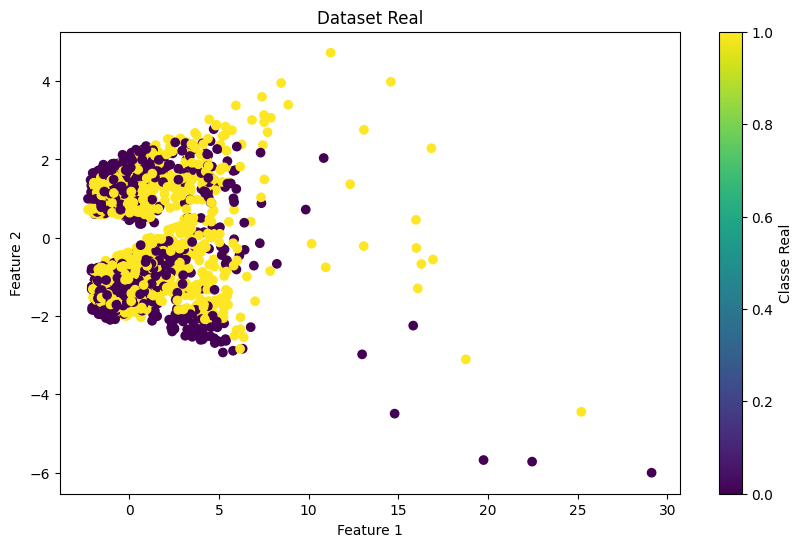

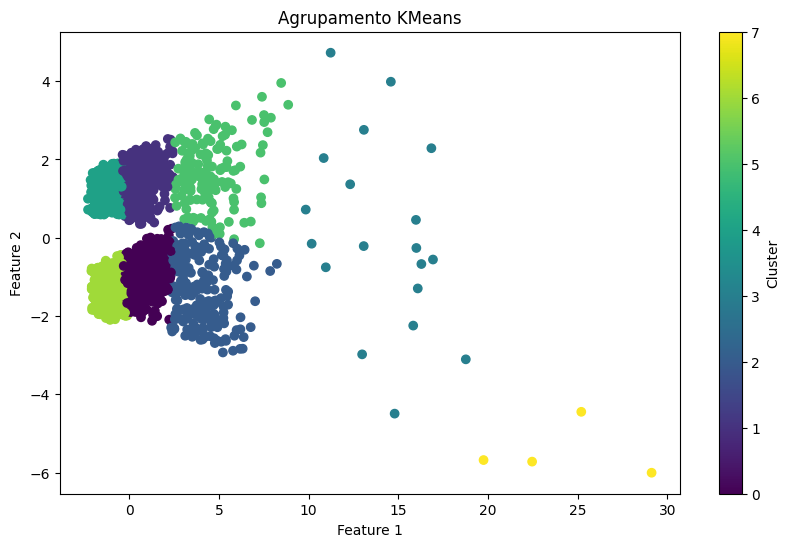

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para o dataset real
plt.figure(figsize=(10, 6))
plt.scatter(entrada_teste[:, 0], entrada_teste[:, 1], c=saida_teste, cmap='viridis', marker='o')
plt.title("Dataset Real")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Classe Real')
plt.show()

# Gráfico para as previsões do KMeans
plt.figure(figsize=(10, 6))
plt.scatter(entrada_teste[:, 0], entrada_teste[:, 1], c=predictions, cmap='viridis', marker='o')
plt.title("Agrupamento KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()



In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Avaliar o agrupamento usando Coeficiente de Silhueta, Índice de Davies-Bouldin e Índice de Calinski-Harabasz
silhouette_avg = silhouette_score(entrada_teste, predictions)
davies_bouldin = davies_bouldin_score(entrada_teste, predictions)
calinski_harabasz = calinski_harabasz_score(entrada_teste, predictions)

print(f"Coeficiente de Silhueta: {silhouette_avg:.2f}")
print(f"Índice de Davies-Bouldin: {davies_bouldin:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")

Coeficiente de Silhueta: 0.49
Índice de Davies-Bouldin: 0.73
Índice de Calinski-Harabasz: 4761.39
